# Towards an automated system for time series analysis

In [1]:
import pyleoclim as pyleo
import lipd as lpd
import os
%load_ext rpy2.ipython

Search the wiki

In [2]:
# variables and parameters
archiveType=["marine sediment","Marine Sediment"]
proxyObsType=[ ]
infVarType=["Sea Surface Temperature"]
sensorGenus=[ ]
sensorSpecies=[ ]
interpName=["temperature","Temperature"]
interpDetail=["sea surface"]
ageUnits=["kyr BP"]
ageBound=[0,10]
ageBoundType=["any"]
recordLength=[4]
resolution=[ ]
lat=[-14,1.5]
lon=[110,135]
alt=[-10000,0]
#functions
res = pyleo.utils.queryLinkedEarth(archiveType=archiveType, proxyObsType=proxyObsType,
                             infVarType = infVarType, sensorGenus=sensorGenus,
                             sensorSpecies=sensorSpecies, interpName=interpName, 
                             interpDetail =interpDetail, ageUnits = ageUnits,
                             ageBound = ageBound, ageBoundType = ageBoundType,
                             recordLength = recordLength, resolution = resolution,
                             lat = lat, lon = lon, alt = alt, 
                             print_response = True, download_lipd = True,
                             download_folder = './lipd')
#outputs

http://wiki.linked.earth/Special:URIResolver/MD01-2D2378.Xu.2008
http://wiki.linked.earth/Special:URIResolver/GeoB10069-2D3.Gibbons.2014


In [3]:
# variables and parameters
archiveType=["marine sediment","Marine Sediment"]
proxyObsType=[ ]
infVarType=["Sea Surface Temperature"]
sensorGenus=[ ]
sensorSpecies=[ ]
interpName=["temperature","Temperature"]
interpDetail=["sea surface"]
ageUnits=["yr BP"]
ageBound=[0,10000]
ageBoundType=["any"]
recordLength=[4000]
resolution=[ ]
lat=[-14,1.5]
lon=[110,135]
alt=[-10000,0]
#functions
res = pyleo.utils.queryLinkedEarth(archiveType=archiveType, proxyObsType=proxyObsType,
                             infVarType = infVarType, sensorGenus=sensorGenus,
                             sensorSpecies=sensorSpecies, interpName=interpName, 
                             interpDetail =interpDetail, ageUnits = ageUnits,
                             ageBound = ageBound, ageBoundType = ageBoundType,
                             recordLength = recordLength, resolution = resolution,
                             lat = lat, lon = lon, alt = alt, 
                             print_response = True, download_lipd = True,
                             download_folder = './lipd')
#outputs

http://wiki.linked.earth/Special:URIResolver/MD98-2D2165.Levi.2007
http://wiki.linked.earth/Special:URIResolver/BJ8-2D03-2D70GGC.Linsley.2010
http://wiki.linked.earth/Special:URIResolver/BJ8-2D03-2D13GGC.Linsley.2010


Open the files and plot the location of the records

Disclaimer: LiPD files may be updated and modified to adhere to standards

Found: 5 LiPD file(s)
reading: BJ8-03-13GGC.Linsley.2010.lpd
reading: GeoB10069-3.Gibbons.2014.lpd
reading: MD98-2165.Levi.2007.lpd
reading: BJ8-03-70GGC.Linsley.2010.lpd
reading: MD01-2378.Xu.2008.lpd
Finished read: 5 records


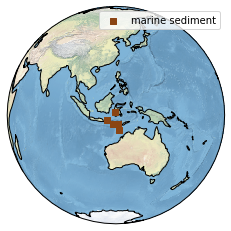

(<Figure size 432x288 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x1a29230e48>)

In [9]:
# variables and parameters
#functions
D = pyleo.Lipd(usr_path=os.getcwd())
D.mapAllArchive(projection='Orthographic', proj_default={'central_longitude':120, 'central_latitude':-5})
#outputs

Age modeling -> R

In [14]:
%%R

library(lipdR) #devtools::install_github("nickmckay/lipd-utilities",subdir - "R")
library(oxcAAR)
library(geoChronR) #devtools::install_github("nickmckay/geoChronR",ref = "improve-age-modeling-workflow")

library(dplyr)
oxcAAR::setOxcalExecutablePath("/Users/deborahkhider/OxCal/bin/OxCalMac")


# BJ8-03-70GGC.Linsley.2010 -----------------------------------------------
L <- readLipd("/Users/deborahkhider/Documents/GitHub/LiPDbooks/notebooks/lipd/BJ8-03-70GGC.Linsley.2010.lpd")

cdf <- createChronMeasInputDf(L,labIDVar = 'id', age14CVar = 'age14c', age14CuncertaintyVar = 'age14cuncertainty', ageVar = 'calendarage', ageUncertaintyVar = 'calendarageuncertainty', depthVar = 'depth', reservoirAge14CVar = NULL, reservoirAge14CUncertaintyVar = NULL, rejectedAgesVar = NULL)


#assign in reservoir ages?
cdf$reservoirAge <- 70
cdf$reservoirAgeUnc <- 50

#add surface age estimate?
sage <- data.frame(labID = "surface",
                   age = 0,
                   ageUnc = 25,
                   depth = 0)

#add in the row
cdf <- dplyr::bind_rows(sage,cdf)



oxMod <- createOxcalModel(cdf,
                          depthInterval = 10,
                          eventsPerUnitLength = .1,
                          eventsPerUnitLengthUncertainty = 0,
                          outlierProb = .05,
                          calCurve = "marine")

oxcalResultFilePath <- oxcAAR::executeOxcalScript(oxMod$modelText)

L <- loadOxcalOutput(L,oxcalResultFilePath,oxMod,modelNum = 1,makeNew = T,maxEns=200)
plotChronEns(L)
writeLipd(L,"/Users/deborahkhider/Documents/GitHub/LiPDbooks/notebooks/lipd/agemodels")

[1] "reading: BJ8-03-70GGC.Linsley.2010.lpd"
Looking for laboratory ID 
[1] "Found it! Moving on..."
Looking for radiocarbon ages 
[1] "Found it! Moving on..."
Looking for 1-sigma radiocarbon age uncertainty (+/-) 
[1] "Found it! Moving on..."
Looking for calibrated/calendar ages 
[1] "Found it! Moving on..."
Looking for 2-sigma calibrated age uncertainty (+/-) 
[1] "Found it! Moving on..."
Looking for depth or position 
[1] "Found it! Moving on..."
Looking for radiocarbon reservoir age offsets (deltaR) 
radiocarbon reservoir age offsets (deltaR) does not seem to exist, moving on.
Looking for radiocarbon reservoir age offsets (deltaR) uncertainties 
radiocarbon reservoir age offsets (deltaR) uncertainties does not seem to exist, moving on.
Looking for rejected ages 
rejected ages does not seem to exist, moving on.
[1] "Variable choices for reuse..."
For future reference: here are the options you chose:
 Find later with getLastVarString()
labIDVar = 'id', age14CVar = 'age14c', age14Cunc

In [16]:
%%R

library(lipdR) #devtools::install_github("nickmckay/lipd-utilities",subdir - "R")
library(oxcAAR)
library(geoChronR) #devtools::install_github("nickmckay/geoChronR",ref = "improve-age-modeling-workflow")

library(dplyr)
oxcAAR::setOxcalExecutablePath("/Users/deborahkhider/OxCal/bin/OxCalMac")

# BJ8-03-13GGC.Linsley.2010 -----------------------------------------------


L <- readLipd("/Users/deborahkhider/Documents/GitHub/LiPDbooks/notebooks/lipd/BJ8-03-13GGC.Linsley.2010.lpd")

cdf <- createChronMeasInputDf(L,labIDVar = 'id', age14CVar = 'age14c', age14CuncertaintyVar = 'age14cuncertainty', ageVar = 'calendarage', ageUncertaintyVar = 'calendarageuncertainty', depthVar = 'depth', reservoirAge14CVar = NULL, reservoirAge14CUncertaintyVar = NULL, rejectedAgesVar = NULL)


#cdf <- createChronMeasInputDf(L)


#assign in reservoir ages?
cdf$reservoirAge <- 70
cdf$reservoirAgeUnc <- 50

#add surface age estimate?
sage <- data.frame(labID = "surface",
                   age = 0,
                   ageUnc = 25,
                   depth = 0)
cdf <- dplyr::bind_rows(sage,cdf)

#                       ,labIDVar = 'labID', age14CVar = 'age', age14CuncertaintyVar = 'uncEstimate', ageVar = 'age', ageUncertaintyVar = NULL, depthVar = 'depth', reservoirAge14CVar = NULL, reservoirAge14CUncertaintyVar = NULL, rejectedAgesVar = NULL) 


#estimate

oxMod <- createOxcalModel(cdf,
                          depthInterval = 10,
                          eventsPerUnitLength = .1,
                          eventsPerUnitLengthUncertainty = 0,
                          outlierProb = .05,
                          calCurve = "marine")

oxcalResultFilePath <- oxcAAR::executeOxcalScript(oxMod$modelText)

L <- loadOxcalOutput(L,oxcalResultFilePath,oxMod,modelNum = 1,makeNew = T, maxEns=200)
plotChronEns(L)
writeLipd(L,"/Users/deborahkhider/Documents/GitHub/LiPDbooks/notebooks/lipd/agemodels")

[1] "reading: BJ8-03-13GGC.Linsley.2010.lpd"
Looking for laboratory ID 
[1] "Found it! Moving on..."
Looking for radiocarbon ages 
[1] "Found it! Moving on..."
Looking for 1-sigma radiocarbon age uncertainty (+/-) 
[1] "Found it! Moving on..."
Looking for calibrated/calendar ages 
[1] "Found it! Moving on..."
Looking for 2-sigma calibrated age uncertainty (+/-) 
[1] "Found it! Moving on..."
Looking for depth or position 
[1] "Found it! Moving on..."
Looking for radiocarbon reservoir age offsets (deltaR) 
radiocarbon reservoir age offsets (deltaR) does not seem to exist, moving on.
Looking for radiocarbon reservoir age offsets (deltaR) uncertainties 
radiocarbon reservoir age offsets (deltaR) uncertainties does not seem to exist, moving on.
Looking for rejected ages 
rejected ages does not seem to exist, moving on.
[1] "Variable choices for reuse..."
For future reference: here are the options you chose:
 Find later with getLastVarString()
labIDVar = 'id', age14CVar = 'age14c', age14Cunc

In [17]:
%%R

library(lipdR) #devtools::install_github("nickmckay/lipd-utilities",subdir - "R")
library(oxcAAR)
library(geoChronR) #devtools::install_github("nickmckay/geoChronR",ref = "improve-age-modeling-workflow")

library(dplyr)
oxcAAR::setOxcalExecutablePath("/Users/deborahkhider/OxCal/bin/OxCalMac")

# GeoB10069-3.Gibbons.2014 ------------------------------------------------
L <- readLipd("/Users/deborahkhider/Documents/GitHub/LiPDbooks/notebooks/lipd/GeoB10069-3.Gibbons.2014.lpd")

cdf <- createChronMeasInputDf(L,labIDVar = NULL, age14CVar = 'age14c', age14CuncertaintyVar = 'age14c uncertainty', ageVar = NULL, ageUncertaintyVar = NULL, depthVar = 'depth', reservoirAge14CVar = NULL, reservoirAge14CUncertaintyVar = NULL, rejectedAgesVar = NULL)


#cdf <- createChronMeasInputDf(L)


#assign in reservoir ages?
cdf$reservoirAge <- 70
cdf$reservoirAgeUnc <- 50

#add surface age estimate?
sage <- data.frame(labID = "surface",
                   age = 0,
                   ageUnc = 25,
                   depth = 0)
cdf <- dplyr::bind_rows(sage,cdf)

oxMod <- createOxcalModel(cdf,
                          depthInterval = .20,
                          eventsPerUnitLength = 10,
                          eventsPerUnitLengthUncertainty = 0,
                          outlierProb = .05,
                          calCurve = "marine")

oxcalResultFilePath <- oxcAAR::executeOxcalScript(oxMod$modelText)

L <- loadOxcalOutput(L,oxcalResultFilePath,oxMod,modelNum = 1,makeNew = T, maxEns=200)
plotChronEns(L)
writeLipd(L,"/Users/deborahkhider/Documents/GitHub/LiPDbooks/notebooks/lipd/agemodels")

[1] "reading: GeoB10069-3.Gibbons.2014.lpd"
Looking for laboratory ID 
laboratory ID does not seem to exist, moving on.
Looking for radiocarbon ages 
[1] "Found it! Moving on..."
converting radiocarbon ages from ka to yr BP 
Looking for 1-sigma radiocarbon age uncertainty (+/-) 
[1] "Found it! Moving on..."
converting 1-sigma radiocarbon age uncertainty (+/-) from ka to yr BP 
Looking for calibrated/calendar ages 
calibrated/calendar ages does not seem to exist, moving on.
Looking for 2-sigma calibrated age uncertainty (+/-) 
2-sigma calibrated age uncertainty (+/-) does not seem to exist, moving on.
Looking for depth or position 
[1] "Found it! Moving on..."
Looking for radiocarbon reservoir age offsets (deltaR) 
radiocarbon reservoir age offsets (deltaR) does not seem to exist, moving on.
Looking for radiocarbon reservoir age offsets (deltaR) uncertainties 
radiocarbon reservoir age offsets (deltaR) uncertainties does not seem to exist, moving on.
Looking for rejected ages 
rejected 

In [18]:
%%R

library(lipdR) #devtools::install_github("nickmckay/lipd-utilities",subdir - "R")
library(oxcAAR)
library(geoChronR) #devtools::install_github("nickmckay/geoChronR",ref = "improve-age-modeling-workflow")

library(dplyr)
oxcAAR::setOxcalExecutablePath("/Users/deborahkhider/OxCal/bin/OxCalMac")

# MD01-2378.Xu.2008 ------------------------------------------------
L <- readLipd("/Users/deborahkhider/Documents/GitHub/LiPDbooks/notebooks/lipd/MD01-2378.Xu.2008.lpd")

cdf <- createChronMeasInputDf(L,labIDVar = 'lab label', age14CVar = 'age14c', age14CuncertaintyVar = 'age14cuncertainty', ageVar = 'calage', ageUncertaintyVar = 'calageuncertainty', depthVar = 'depth', reservoirAge14CVar = NULL, reservoirAge14CUncertaintyVar = NULL, rejectedAgesVar = NULL)


#cdf <- createChronMeasInputDf(L)


#assign in reservoir ages?
cdf$reservoirAge <- 70
cdf$reservoirAgeUnc <- 50

#add surface age estimate?
sage <- data.frame(labID = "surface",
                   age = 0,
                   ageUnc = 25,
                   depth = 0)
cdf <- dplyr::bind_rows(sage,cdf)

oxMod <- createOxcalModel(cdf,
                          depthInterval = .10,
                          eventsPerUnitLength = 20,
                          eventsPerUnitLengthUncertainty = 0,
                          outlierProb = .05,
                          calCurve = "marine")

oxcalResultFilePath <- oxcAAR::executeOxcalScript(oxMod$modelText)

L <- loadOxcalOutput(L,oxcalResultFilePath,oxMod,modelNum = 1,makeNew = T, maxEns=200)
plotChronEns(L)
writeLipd(L,"/Users/deborahkhider/Documents/GitHub/LiPDbooks/notebooks/lipd/agemodels")

[1] "reading: MD01-2378.Xu.2008.lpd"
Looking for laboratory ID 
[1] "Found it! Moving on..."
Looking for radiocarbon ages 
[1] "Found it! Moving on..."
Looking for 1-sigma radiocarbon age uncertainty (+/-) 
[1] "Found it! Moving on..."
Looking for calibrated/calendar ages 
[1] "Found it! Moving on..."
Looking for 2-sigma calibrated age uncertainty (+/-) 
[1] "Found it! Moving on..."
Looking for depth or position 
[1] "Found it! Moving on..."
Looking for radiocarbon reservoir age offsets (deltaR) 
radiocarbon reservoir age offsets (deltaR) does not seem to exist, moving on.
Looking for radiocarbon reservoir age offsets (deltaR) uncertainties 
radiocarbon reservoir age offsets (deltaR) uncertainties does not seem to exist, moving on.
Looking for rejected ages 
rejected ages does not seem to exist, moving on.
[1] "Variable choices for reuse..."
For future reference: here are the options you chose:
 Find later with getLastVarString()
labIDVar = 'lab label', age14CVar = 'age14c', age14Cunce

In [19]:
%%R

library(lipdR) #devtools::install_github("nickmckay/lipd-utilities",subdir - "R")
library(oxcAAR)
library(geoChronR) #devtools::install_github("nickmckay/geoChronR",ref = "improve-age-modeling-workflow")

library(dplyr)
oxcAAR::setOxcalExecutablePath("/Users/deborahkhider/OxCal/bin/OxCalMac")

# MD98-2165.Levi.2007 ------------------------------------------------
L <- readLipd("/Users/deborahkhider/Documents/GitHub/LiPDbooks/notebooks/lipd/MD98-2165.Levi.2007.lpd")

cdf <- createChronMeasInputDf(L,labIDVar = 'sample code', age14CVar = 'age14c', age14CuncertaintyVar = 'age14cuncertainty', ageVar = 'cal. age', ageUncertaintyVar = 'cal. age uncertainty', depthVar = 'corrected depth', reservoirAge14CVar = NULL, reservoirAge14CUncertaintyVar = NULL, rejectedAgesVar = NULL) 


#assign in reservoir ages?
cdf$reservoirAge <- 70
cdf$reservoirAgeUnc <- 50

#remove outlier
cdf <- cdf[-1,]

#add surface age estimate?
sage <- data.frame(labID = "surface",
                   age = 0,
                   ageUnc = 25,
                   depth = 0)
cdf <- dplyr::bind_rows(sage,cdf)


oxMod <- createOxcalModel(cdf,
                          depthInterval = 20,
                          eventsPerUnitLength = .010,
                          eventsPerUnitLengthUncertainty = 0,
                          outlierProb = .05,
                          calCurve = "marine")

oxcalResultFilePath <- oxcAAR::executeOxcalScript(oxMod$modelText)

L <- loadOxcalOutput(L,oxcalResultFilePath,oxMod,modelNum = 1,makeNew = T,maxEns=200)
plotChronEns(L)
writeLipd(L,"/Users/deborahkhider/Documents/GitHub/LiPDbooks/notebooks/lipd/agemodels")

[1] "reading: MD98-2165.Levi.2007.lpd"
Looking for laboratory ID 
[1] "Found it! Moving on..."
Looking for radiocarbon ages 
[1] "Found it! Moving on..."
Looking for 1-sigma radiocarbon age uncertainty (+/-) 
[1] "Found it! Moving on..."
Looking for calibrated/calendar ages 
[1] "Found it! Moving on..."
Looking for 2-sigma calibrated age uncertainty (+/-) 
[1] "Found it! Moving on..."
Looking for depth or position 
[1] "Found it! Moving on..."
Looking for radiocarbon reservoir age offsets (deltaR) 
radiocarbon reservoir age offsets (deltaR) does not seem to exist, moving on.
Looking for radiocarbon reservoir age offsets (deltaR) uncertainties 
radiocarbon reservoir age offsets (deltaR) uncertainties does not seem to exist, moving on.
Looking for rejected ages 
rejected ages does not seem to exist, moving on.
[1] "Variable choices for reuse..."
For future reference: here are the options you chose:
 Find later with getLastVarString()
labIDVar = 'sample code', age14CVar = 'age14c', age14C

Moving to spectral analysis

In [2]:
D2=pyleo.Lipd(usr_path='/Users/deborahkhider/Documents/GitHub/LiPDbooks/notebooks/lipd/agemodels')
ts_list = D2.to_tso()

Disclaimer: LiPD files may be updated and modified to adhere to standards

Found: 5 LiPD file(s)
reading: BJ8-03-13GGC.Linsley.2010.lpd
reading: GeoB10069-3.Gibbons.2014.lpd
reading: MD98-2165.Levi.2007.lpd
reading: BJ8-03-70GGC.Linsley.2010.lpd
reading: MD01-2378.Xu.2008.lpd
Finished read: 5 records
extracting paleoData...
extracting: BJ8-03-13GGC.Linsley.2010
extracting: GeoB10069-3.Gibbons.2014
extracting: MD98-2165.Levi.2007
extract: Exception: can only concatenate list (not "str") to list
extracting: BJ8-03-70GGC.Linsley.2010
extracting: MD01-2378.Xu.2008
extract: Exception: can only concatenate list (not "str") to list
Created time series: 21 entries


In [3]:
ts_sst=[]
for item in ts_list:
    if 'paleoData_inferredVariableType' in item.keys():
        if item['paleoData_inferredVariableType'] == 'Sea Surface Temperature':
            ts_sst.append(item)
         
for item in ts_sst:
    if 'paleoData_inferredFrom_variableName' in item.keys():
        proxy=item['paleoData_inferredFrom_variableName']
    else:
        proxy='N/A'
    print(item['dataSetName']+': '+proxy)

BJ8-03-13GGC.Linsley.2010: mg/ca
BJ8-03-13GGC.Linsley.2010: N/A
GeoB10069-3.Gibbons.2014: mg/ca
BJ8-03-70GGC.Linsley.2010: mg/ca
BJ8-03-70GGC.Linsley.2010: sst


Performing spectral analysis on surrogates: 100%|██████████| 199/199 [14:35<00:00,  4.07s/it]


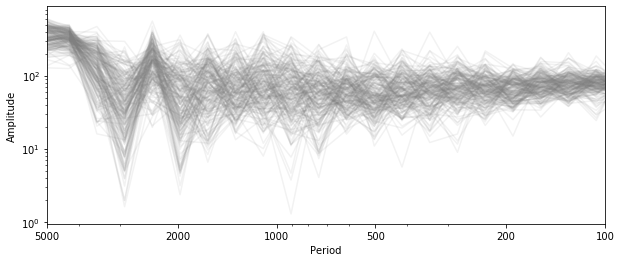

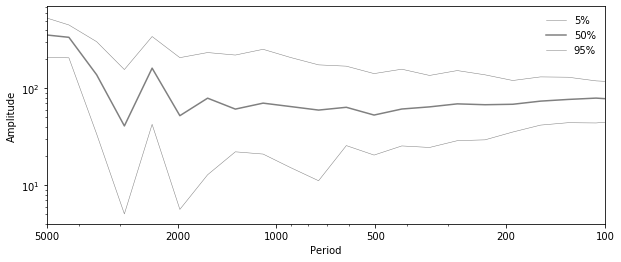

(<Figure size 720x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a4a3a9668>)

In [5]:
#BJ8-03-13GGC.Linsley.2010
ts=pyleo.LipdSeries(ts_sst[0])
#extract age information
ms_ens = ts.chronEnsembleToPaleo(D2)
#Standardize
ms_ens_std=ms_ens.standardize()
#detrend
ms_ens_detrend=ms_ens_std.detrend()
#Spectral analysis
psds_ens=ms_ens_detrend.spectral()
#Plot
psds_ens.plot(plot_kwargs={'color':'gray', 'alpha':0.1})
ens_qs=psds_ens.quantiles()
ens_qs.plot()

Performing spectral analysis on surrogates: 100%|██████████| 199/199 [14:33<00:00,  3.95s/it]


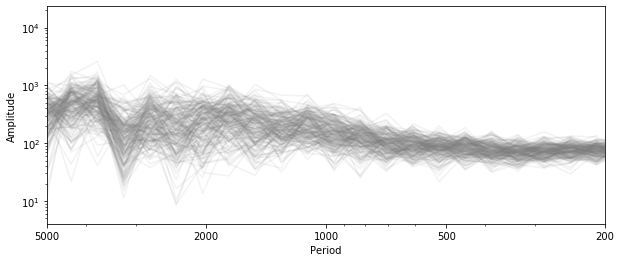

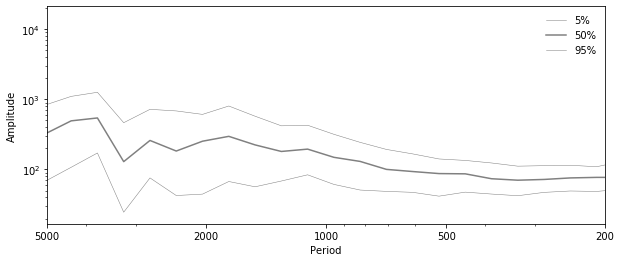

(<Figure size 720x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a6abbec88>)

In [7]:
#GeoB10069-3.Gibbons.2014
ts2=pyleo.LipdSeries(ts_sst[2])
#extract age information
ms_ens2 = ts2.chronEnsembleToPaleo(D2)
#Standardize
ms_ens_std2=ms_ens2.standardize()
#detrend
ms_ens_detrend2=ms_ens_std2.detrend()
#Spectral analysis
psds_ens2=ms_ens_detrend2.spectral()
#Plot
psds_ens2.plot(plot_kwargs={'color':'gray', 'alpha':0.1})
ens_qs2=psds_ens2.quantiles()
ens_qs2.plot()

Performing spectral analysis on surrogates: 100%|██████████| 199/199 [13:48<00:00,  4.15s/it]


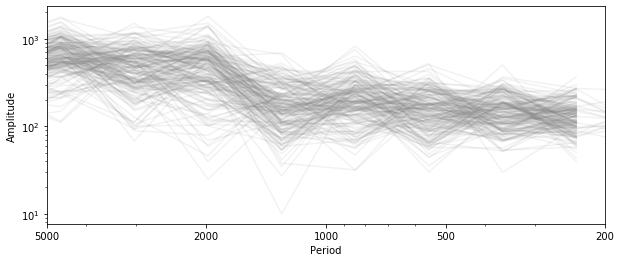

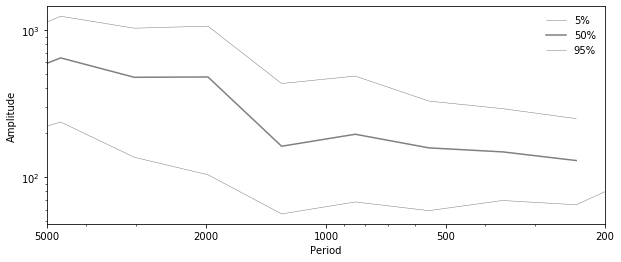

(<Figure size 720x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a8773d9e8>)

In [8]:
#BJ8-03-70GGC.Linsley.2010
ts3=pyleo.LipdSeries(ts_sst[3])
#extract age information
ms_ens3 = ts3.chronEnsembleToPaleo(D2)
#Standardize
ms_ens_std3=ms_ens3.standardize()
#detrend
ms_ens_detrend3=ms_ens_std3.detrend()
#Spectral analysis
psds_ens3=ms_ens_detrend3.spectral()
#Plot
psds_ens3.plot(plot_kwargs={'color':'gray', 'alpha':0.1})
ens_qs3=psds_ens3.quantiles()
ens_qs3.plot()